# COVID-19 Recovery & Symptoms

# Data Cleaning

## Import packages&read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import sklearn

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('C:/Users/luyid/Downloads/COVID19_line_list_data.csv')

In [3]:
data.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender1,age,symptom_onset,...,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,gender
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,...,12/29/2019,1/4/2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,1
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,NaN,1/12/2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,0
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,...,NaN,1/3/2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,1
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,0
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,1


In [5]:
data['location'].value_counts()

South Korea    112
Singapore       93
Hong Kong       80
Hokkaido        48
Thailand        41
              ... 
Strasbourg       1
Egypt            1
Belgium          1
Montpellier      1
Lapland          1
Name: location, Length: 156, dtype: int64

In [13]:
s=data['location'].value_counts()
print(s.values)
print(s.index)

[112  93  80  48  41  34  32  31  25  22  21  21  20  19  18  18  17  15
  14  12  11  11  11  11  10   9   9   9   9   8   8   8   8   7   7   7
   7   7   6   5   5   5   5   5   5   5   5   5   4   4   4   4   4   4
   4   4   4   4   3   3   3   3   3   3   3   3   3   3   3   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1]
Index(['South Korea', 'Singapore', 'Hong Kong', 'Hokkaido', 'Thailand',
       'Taiwan', 'Wuhan, Hubei', 'Shaanxi', 'Tokyo', 'Tianjin',
       ...
       'Tsing Yi', 'Bois-Guillaume', 'Canary Islands', 'Tyumen', 'Wisconsin',
       'Sri Lanka', 'Inner Mongolia', 'Mallorca', 'Yau Ma Tei', 'Mie'],
      dtype='object', length=156)


In [8]:
s=data['location'].value_counts()
my_dict=s.to_dict()
for k in my_dict:
    print(k+': ', my_dict[k])

South Korea:  112
Singapore:  93
Hong Kong:  80
Hokkaido:  48
Thailand:  41
Taiwan:  34
Wuhan, Hubei:  32
Shaanxi:  31
Tokyo:  25
Tianjin:  22
North Rhine-Westphalia:  21
UAE:  21
Nagoya City:  20
Yunnan:  19
Japan:  18
Beijing:  18
Bahrain:  17
Bavaria:  15
Malaysia:  14
Wakayama Prefecture:  12
Qom:  11
California:  11
Chiba Prefecture:  11
Baden-Wuerttemberg:  11
Paris:  10
London:  9
Sagamihara:  9
Kuwait:  9
Hubei:  9
Andalusia:  8
Sichuan:  8
Vinh Phuc:  8
Johor:  8
Valencia:  7
Kanagawa:  7
Aichi Prefecture:  7
UK:  7
Vancouver:  7
France:  6
Guangxi:  5
Madrid:  5
Sapporo:  5
Toronto:  5
Saint-Mande:  5
Tenerife:  5
Hunan:  5
Ishikawa:  5
Queensland:  5
Kumamoto City:  4
NSW:  4
Liaoning:  4
Macau:  4
Annecy:  4
Kowloon:  4
Victoria:  4
Tehran:  4
Henan:  4
Dijon:  4
Okinawa Prefecture:  3
Rome:  3
Osaka Prefecture:  3
Jiangxi:  3
Guizhou:  3
Shandong:  3
Barcelona:  3
Xinjiang:  3
Shanxi (陕西):  3
Gansu:  3
Vietnam:  3
South Australia:  2
York:  2
Kerala:  2
Tubingen:  2
Manila

In [6]:
res = data['location'].value_counts().to_frame('count').rename_axis('city').reset_index()
print(res)

            city  count
0    South Korea    112
1      Singapore     93
2      Hong Kong     80
3       Hokkaido     48
4       Thailand     41
..           ...    ...
151   Strasbourg      1
152        Egypt      1
153      Belgium      1
154  Montpellier      1
155      Lapland      1

[156 rows x 2 columns]


In [7]:
for i in range(len(res)):
    print(res.loc[i,'city'], res.loc[i,'count']  )
    print()

South Korea 112
Singapore 93
Hong Kong 80
Hokkaido 48
Thailand 41
Taiwan 34
Wuhan, Hubei 32
Shaanxi 31
Tokyo 25
Tianjin 22
North Rhine-Westphalia 21
UAE 21
Nagoya City 20
Yunnan 19
Beijing 18
Japan 18
Bahrain 17
Bavaria 15
Malaysia 14
Wakayama Prefecture 12
Qom 11
Chiba Prefecture 11
California 11
Baden-Wuerttemberg 11
Paris 10
Kuwait 9
Sagamihara 9
London 9
Hubei 9
Andalusia 8
Johor 8
Sichuan 8
Vinh Phuc 8
Kanagawa 7
Vancouver 7
Aichi Prefecture 7
Valencia 7
UK 7
France 6
Tenerife 5
Toronto 5
Ishikawa 5
Hunan 5
Guangxi 5
Saint-Mande 5
Sapporo 5
Madrid 5
Queensland 5
Dijon 4
Liaoning 4
Tehran 4
Kumamoto City 4
NSW 4
Victoria 4
Macau 4
Kowloon 4
Annecy 4
Henan 4
Vietnam 3
Guizhou 3
Barcelona 3
Xinjiang 3
Jiangxi 3
Okinawa Prefecture 3
Gansu 3
Osaka Prefecture 3
Shanxi (陕西) 3
Shandong 3
Rome 3
Tubingen 2
Hechi, Guangxi 2
Heilongjiang 2
Fukuoka Prefecture 2
Jilin 2
Illinois 2
Kwun Tong 2
Castile and Leon 2
South Australia 2
Shanghai 2
Frankfurt 2
Gifu Prefecture 2
Kerala 2
Hanoi 2
Manila 

In [61]:
data['recovered'].value_counts()

0             926
2/18/2020      13
2/19/2020      13
12/30/1899     12
2/12/2020      11
2/21/2020      10
2/20/2020       9
2/15/2020       9
2/14/2020       8
1               7
2/17/2020       7
2/24/2020       7
2/9/2020        6
2/26/2020       6
2/25/2020       5
2/27/2020       5
2/6/2020        4
2/4/2020        4
2/16/2020       3
2/22/2020       3
2/11/2020       3
1/30/2020       2
2/5/2020        2
2/8/2020        2
2/23/2020       1
1/31/2020       1
2/7/2020        1
1/15/2020       1
2/28/2020       1
2/2/2020        1
2/13/2020       1
1/17/2020       1
Name: recovered, dtype: int64

In [62]:
pd.set_option("display.max_rows", 1000000)
pd.set_option("display.max_columns", 1000000)

## Adding Exposure Duration, Sympotom Duration & Hopspital Time from Dates

In [63]:
data.isnull().sum().sort_values(ascending=False).head()

Unnamed: 3         1085
exposure_start      957
symptom             815
exposure_end        744
hosp_visit_date     578
dtype: int64

In [64]:
data['A']=pd.to_datetime(data['symptom_onset'])
data['B']=pd.to_datetime(data['hosp_visit_date'])
data['C']=pd.to_datetime(data['exposure_start'])
data['D']=pd.to_datetime(data['exposure_end'])

In [65]:
data['toHospital'] = (data['B']-data['A']).dt.days
data['exposure'] = (data['D']-data['C']).dt.days
data['exp_symp'] = (data['A']-data['C']).dt.days

In [66]:
data.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender1,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,gender,A,B,C,D,toHospital,exposure,exp_symp
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,1,2020-01-03,2020-01-11,2019-12-29,2020-01-04,8.0,6.0,5.0
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,0,2020-01-15,2020-01-15,NaT,2020-01-12,0.0,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,1,2020-01-04,2020-01-17,NaT,2020-01-03,13.0,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,0,NaT,2020-01-19,NaT,NaT,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,1,NaT,2020-01-14,NaT,NaT,NaN,NaN,NaN


In [67]:
data= data.drop(['location','A','B','C','D','id','reporting date','summary','symptom_onset','If_onset_approximated','hosp_visit_date','exposure_start','exposure_end','from Wuhan','source','link','Unnamed: 3','case_in_country','gender1','death'], axis = 1)

## Recode Country

In [68]:
data['country'].value_counts()

China          197
Japan          190
South Korea    114
Hong Kong       94
Singapore       93
Germany         54
Thailand        41
France          39
Taiwan          34
Spain           34
Malaysia        23
UAE             21
UK              20
Iran            18
USA             18
Bahrain         17
Vietnam         16
Australia       15
Canada          12
Kuwait           9
Italy            3
Phillipines      3
India            3
Russia           2
Austria          2
Cambodia         1
Afghanistan      1
Nepal            1
Belgium          1
Switzerland      1
Israel           1
Sri Lanka        1
Algeria          1
Egypt            1
Sweden           1
Lebanon          1
Finland          1
Croatia          1
Name: country, dtype: int64

In [69]:
data['MainlandChina'] = [1 if x.strip() == "China" else 0 for x in data['country']]
data['Japan'] = [1 if x.strip() == "Japan" else 0 for x in data['country']]
data['South_Korea'] = [1 if x.strip() == "South Korea" else 0 for x in data['country']]
data['Hongkong_China'] = [1 if x.strip() == "Hong Kong" else 0 for x in data['country']]
data['Singapore'] = [1 if x.strip() == "Singapore" else 0 for x in data['country']]
data['Germany'] = [1 if x.strip() == "Germany" else 0 for x in data['country']]
data['Thailand'] = [1 if x.strip() == "Thailand" else 0 for x in data['country']]
data['France'] = [1 if x.strip() == "France" else 0 for x in data['country']]
data['Taiwan_China'] = [1 if x.strip() == "Taiwan" else 0 for x in data['country']]
data['Spain'] = [1 if x.strip() == "Spain" else 0 for x in data['country']]
data.loc[(data['MainlandChina'] ==0) & (data['Japan'] == 0) & (data['South_Korea'] == 0) & (data['Hongkong_China'] == 0) & (data['Singapore'] == 0) & (data['Germany'] == 0) & (data['Thailand'] == 0) & (data['France'] == 0) & (data['Taiwan_China'] == 0) & (data['Spain'] == 0), 'Othercountry'] = 1
data.loc[(data['Othercountry'] != 1), 'Othercountry'] = 0

In [70]:
data= data.drop('country', axis=1)

In [71]:
data['Othercountry'].value_counts()

0.0    890
1.0    195
Name: Othercountry, dtype: int64

In [72]:
data['gender'].value_counts()

1    620
0    465
Name: gender, dtype: int64

In [73]:
data.head()

,age,visiting Wuhan,recovered,symptom,gender,toHospital,exposure,exp_symp,MainlandChina,Japan,South_Korea,Hongkong_China,Singapore,Germany,Thailand,France,Taiwan_China,Spain,Othercountry
0,66.0,1,0,NaN,1,8.0,6.0,5.0,1,0,0,0,0,0,0,0,0,0,0.0
1,56.0,0,0,NaN,0,0.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0
2,46.0,0,0,NaN,1,13.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0
3,60.0,1,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0
4,58.0,0,0,NaN,1,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0


##  Editing Sympotoms from Combination Objects to Multiple Dummy Variables

In [74]:
data['symptom'].value_counts()

fever                                                          73
fever, cough                                                   36
cough                                                          14
fever, malaise                                                  7
fever, cough, malaise                                           6
fever, sore throat                                              6
fever, cough, sputum                                            3
fever, cough, sore throat                                       3
cough, fever                                                    3
fever, cough, headache                                          3
fever, runny nose                                               3
cough, shortness of breath                                      3
sore throat                                                     3
cough, malaise                                                  2
cough, sore throat                                              2
fever, hea

In [75]:
data['column_new'] = data['symptom'].astype('str') 

In [76]:
data['fever'] = [1 if 'fever' in x else 0 for x in data['column_new']]
data['fever'] = [1 if 'feaver' in x else 0 for x in data['column_new']]
data['high_fever'] = [1 if 'high fever' in x else 0 for x in data['column_new']]
data['chest_discomfort'] = [1 if 'chest discomfort' in x else 0 for x in data['column_new']]
data['chest_discomfort'] = [1 if 'chest pain' in x else 0 for x in data['column_new']]
data['cold'] = [1 if 'cold' in x else 0 for x in data['column_new']]
data['cough'] = [1 if 'cough' in x else 0 for x in data['column_new']]
data['cough'] = [1 if 'cough with sputum' in x else 0 for x in data['column_new']]
data['cough'] = [1 if 'coughing' in x else 0 for x in data['column_new']]
data['chill'] = [1 if 'chill' in x else 0 for x in data['column_new']]
data['chill'] = [1 if 'chills' in x else 0 for x in data['column_new']]
data['fever'] = [1 if 'fever' in x else 0 for x in data['column_new']]
data['pneumonia'] = [1 if 'pneumonia' in x else 0 for x in data['column_new']]
data['joint_pain'] = [1 if 'joint pain' in x else 0 for x in data['column_new']]
data['shortness_breath'] = [1 if 'shortness of breath' in x else 0 for x in data['column_new']]
data['shortness_breath'] = [1 if 'breathlessness' in x else 0 for x in data['column_new']]
data['diarrhea'] = [1 if 'diarrhea' in x else 0 for x in data['column_new']]
data['vomiting'] = [1 if 'vomiting' in x else 0 for x in data['column_new']]
data['headache'] = [1 if 'headache' in x else 0 for x in data['column_new']]
data['nausea'] = [1 if 'nausea' in x else 0 for x in data['column_new']]
data['diarrhea'] = [1 if 'diarrhea' in x else 0 for x in data['column_new']]
data['itchy_throat'] = [1 if 'itchy throat' in x else 0 for x in data['column_new']]
data['malaise'] = [1 if 'malaise' in x else 0 for x in data['column_new']]
data['runny_nose'] = [1 if 'runny nose' in x else 0 for x in data['column_new']]
data['sneeze'] = [1 if 'sneeze' in x else 0 for x in data['column_new']]
data['sore_throat'] = [1 if 'sore throat' in x else 0 for x in data['column_new']]
data['sputum'] = [1 if 'sputum' in x else 0 for x in data['column_new']]
data['dyspnea'] = [1 if 'dyspnea' in x else 0 for x in data['column_new']]
data['fatigue'] = [1 if 'fatigue' in x else 0 for x in data['column_new']]
data['difficulty_breathing'] = [1 if 'difficulty breathing' in x else 0 for x in data['column_new']]
data['loss_appetite'] = [1 if 'loss of appetite' in x else 0 for x in data['column_new']]
data['headache'] = [1 if 'loss of appetite' in x else 0 for x in data['column_new']]
data['muscle_pain'] = [1 if 'muscle pain' in x else 0 for x in data['column_new']]
data['abdominal_pain'] = [1 if 'abdominal pain' in x else 0 for x in data['column_new']]
data['heavy_head'] = [1 if 'heavy head' in x else 0 for x in data['column_new']]
data['muscle_pain'] = [1 if 'muscle cramps' in x else 0 for x in data['column_new']]
data['muscle_pain'] = [1 if 'muscle aches' in x else 0 for x in data['column_new']]
data['muscle_pain'] = [1 if 'sore body' in x else 0 for x in data['column_new']]
data['runny_nose'] = [1 if 'runny nose' in x else 0 for x in data['column_new']]
data['throat discomfort'] = [1 if 'throat discomfort' in x else 0 for x in data['column_new']]
data['myalgia'] = [1 if 'myalgia' in x else 0 for x in data['column_new']]
data['nausea'] = [1 if 'nausea' in x else 0 for x in data['column_new']]
data['reflux'] = [1 if 'reflux' in x else 0 for x in data['column_new']]

In [77]:
data.loc[(data['recovered']!="0"), 'recover']=1
data.loc[(data['recover']!=1), 'recover']=0

In [78]:
data= data.drop(['symptom','column_new'], axis=1)

In [79]:
data.head()

,age,visiting Wuhan,recovered,gender,toHospital,exposure,exp_symp,MainlandChina,Japan,South_Korea,Hongkong_China,Singapore,Germany,Thailand,France,Taiwan_China,Spain,Othercountry,fever,high_fever,chest_discomfort,cold,cough,chill,pneumonia,joint_pain,shortness_breath,diarrhea,vomiting,headache,nausea,itchy_throat,malaise,runny_nose,sneeze,sore_throat,sputum,dyspnea,fatigue,difficulty_breathing,loss_appetite,muscle_pain,abdominal_pain,heavy_head,throat discomfort,myalgia,reflux,recover
0,66.0,1,0,1,8.0,6.0,5.0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,56.0,0,0,0,0.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,46.0,0,0,1,13.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,60.0,1,0,0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,58.0,0,0,1,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [80]:
data['toHospital'].describe()

count    449.000000
mean       2.761693
std        3.247080
min       -5.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: toHospital, dtype: float64

In [81]:
data['exposure'].describe()

count    122.000000
mean       5.131148
std        7.033510
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       29.000000
Name: exposure, dtype: float64

In [82]:
data['exp_symp'].describe()

count    83.000000
mean      8.180723
std       6.786185
min      -2.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      34.000000
Name: exp_symp, dtype: float64

In [83]:
data['age'].describe()

count    843.000000
mean      49.483689
std       18.255334
min        0.250000
25%       35.000000
50%       51.000000
75%       64.000000
max       96.000000
Name: age, dtype: float64

# Data Visualization

C:\Users\luyid\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\luyid\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\luyid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\luyid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


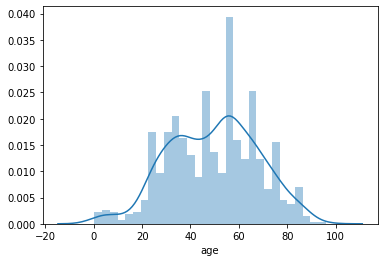

In [84]:
sns.distplot(data['age'], bins = 30)

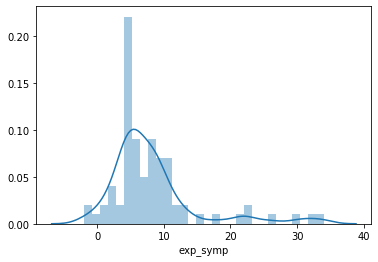

In [85]:
sns.distplot(data['exp_symp'], bins = 30)

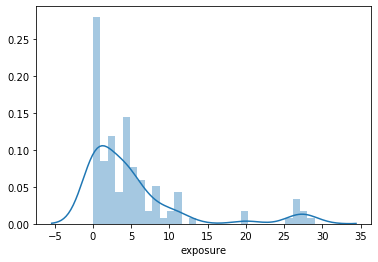

In [86]:
sns.distplot(data['exposure'], bins = 30)

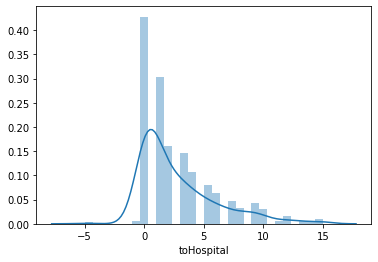

In [87]:
sns.distplot(data['toHospital'], bins = 30)

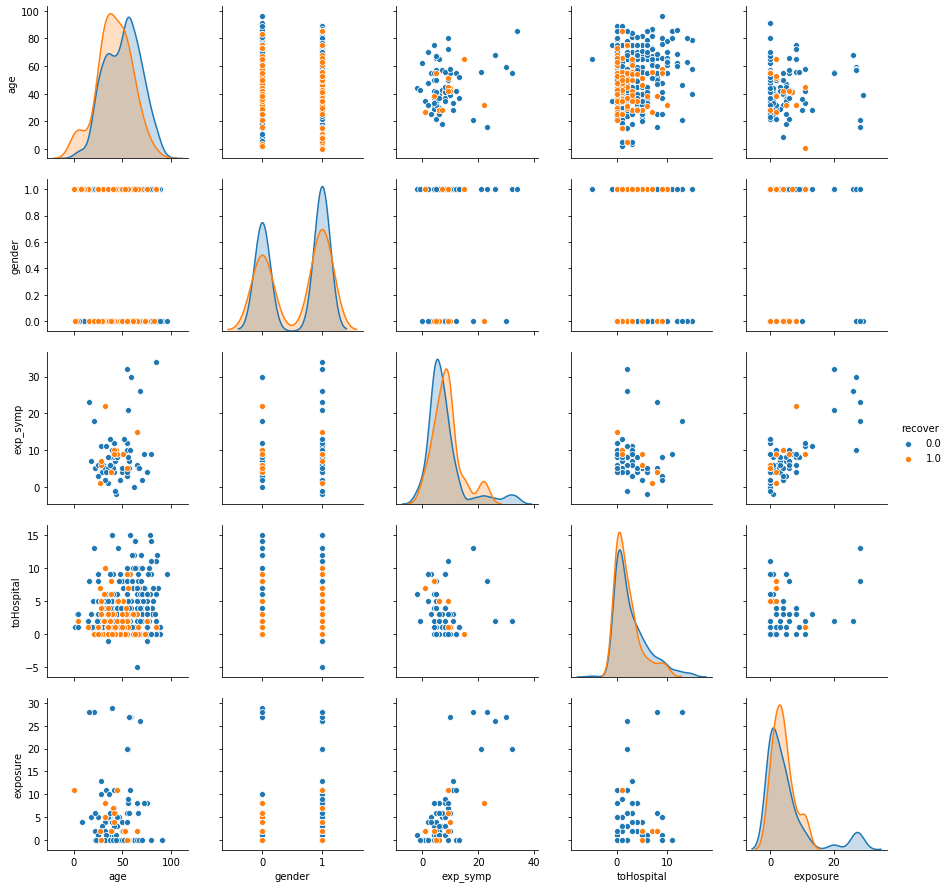

In [156]:
sns.pairplot(data, hue = "recover", vars=['age','gender', 'exp_symp', 'toHospital','exposure']);

Text(0.5, 0, 'age')

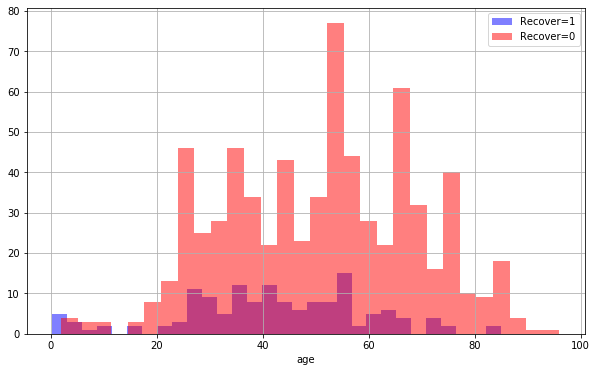

In [88]:
plt.figure(figsize=(10,6))
data[data['recover']==1]['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Recover=1')
data[data['recover']==0]['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Recover=0')
plt.legend()
plt.xlabel('age')

In [93]:
data.head()

,age,visiting Wuhan,recovered,gender,toHospital,exposure,exp_symp,MainlandChina,Japan,South_Korea,Hongkong_China,Singapore,Germany,Thailand,France,Taiwan_China,Spain,Othercountry,fever,high_fever,chest_discomfort,cold,cough,chill,pneumonia,joint_pain,shortness_breath,diarrhea,vomiting,headache,nausea,itchy_throat,malaise,runny_nose,sneeze,sore_throat,sputum,dyspnea,fatigue,difficulty_breathing,loss_appetite,muscle_pain,abdominal_pain,heavy_head,throat discomfort,myalgia,reflux,recover
0,66.0,1,0,1,8.0,6.0,5.0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,56.0,0,0,0,0.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,46.0,0,0,1,13.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,60.0,1,0,0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,58.0,0,0,1,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


## Split Data

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
X = data.drop(['recovered','recover'], axis=1)
y = data['recover']

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 46 columns):
age                     843 non-null float64
visiting Wuhan          1085 non-null int64
gender                  1085 non-null int64
toHospital              449 non-null float64
exposure                122 non-null float64
exp_symp                83 non-null float64
MainlandChina           1085 non-null int64
Japan                   1085 non-null int64
South_Korea             1085 non-null int64
Hongkong_China          1085 non-null int64
Singapore               1085 non-null int64
Germany                 1085 non-null int64
Thailand                1085 non-null int64
France                  1085 non-null int64
Taiwan_China            1085 non-null int64
Spain                   1085 non-null int64
Othercountry            1085 non-null float64
fever                   1085 non-null int64
high_fever              1085 non-null int64
chest_discomfort        1085 non-null int64
cold    

In [97]:
y.value_counts()

0.0    926
1.0    159
Name: recover, dtype: int64

In [98]:
x_tr, x_te, y_tr, y_te=train_test_split(X, y, test_size=0.5, random_state=4)

In [99]:
x_tr.head()

,age,visiting Wuhan,gender,toHospital,exposure,exp_symp,MainlandChina,Japan,South_Korea,Hongkong_China,Singapore,Germany,Thailand,France,Taiwan_China,Spain,Othercountry,fever,high_fever,chest_discomfort,cold,cough,chill,pneumonia,joint_pain,shortness_breath,diarrhea,vomiting,headache,nausea,itchy_throat,malaise,runny_nose,sneeze,sore_throat,sputum,dyspnea,fatigue,difficulty_breathing,loss_appetite,muscle_pain,abdominal_pain,heavy_head,throat discomfort,myalgia,reflux
989,NaN,1,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,1,0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,75.0,0,1,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
432,52.0,0,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
798,NaN,0,1,NaN,3.0,6.0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
x_tr = x_tr.fillna(x_tr.mean())
x_te = x_te.fillna(x_te.mean())

In [101]:
x_tr.head()

,age,visiting Wuhan,gender,toHospital,exposure,exp_symp,MainlandChina,Japan,South_Korea,Hongkong_China,Singapore,Germany,Thailand,France,Taiwan_China,Spain,Othercountry,fever,high_fever,chest_discomfort,cold,cough,chill,pneumonia,joint_pain,shortness_breath,diarrhea,vomiting,headache,nausea,itchy_throat,malaise,runny_nose,sneeze,sore_throat,sputum,dyspnea,fatigue,difficulty_breathing,loss_appetite,muscle_pain,abdominal_pain,heavy_head,throat discomfort,myalgia,reflux
989,49.93705,1,0,2.9447,5.793651,8.475,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.00000,1,0,2.9447,5.793651,8.475,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,75.00000,0,1,0.0000,5.793651,8.475,0,1,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
432,52.00000,0,1,2.9447,5.793651,8.475,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
798,49.93705,0,1,2.9447,3.000000,6.000,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
x_te.head()

,age,visiting Wuhan,gender,toHospital,exposure,exp_symp,MainlandChina,Japan,South_Korea,Hongkong_China,Singapore,Germany,Thailand,France,Taiwan_China,Spain,Othercountry,fever,high_fever,chest_discomfort,cold,cough,chill,pneumonia,joint_pain,shortness_breath,diarrhea,vomiting,headache,nausea,itchy_throat,malaise,runny_nose,sneeze,sore_throat,sputum,dyspnea,fatigue,difficulty_breathing,loss_appetite,muscle_pain,abdominal_pain,heavy_head,throat discomfort,myalgia,reflux
411,35.000000,0,1,1.000000,4.423729,7.906977,0,1,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
853,49.039906,1,1,2.590517,4.423729,7.906977,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306,65.000000,0,1,0.000000,4.423729,7.906977,0,1,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1076,49.039906,0,1,2.590517,4.423729,7.906977,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
881,75.000000,0,1,2.000000,4.423729,7.906977,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
x_tr['toHospital'].value_counts()

 2.9447     325
 0.0000      59
 1.0000      44
 2.0000      23
 4.0000      21
 3.0000      18
 5.0000      11
 9.0000       8
 6.0000       7
 7.0000       6
 8.0000       5
 10.0000      5
 12.0000      4
 14.0000      2
 11.0000      2
-1.0000       1
 13.0000      1
Name: toHospital, dtype: int64

In [104]:
x_te['toHospital'].value_counts()

 2.590517     311
 0.000000      69
 1.000000      47
 3.000000      26
 2.000000      25
 5.000000      13
 6.000000      12
 4.000000      11
 7.000000       8
 9.000000       5
 8.000000       5
 10.000000      4
 15.000000      3
-5.000000       1
 13.000000      1
-1.000000       1
 12.000000      1
Name: toHospital, dtype: int64

In [105]:
x_tr['toHospital'].value_counts()

 2.9447     325
 0.0000      59
 1.0000      44
 2.0000      23
 4.0000      21
 3.0000      18
 5.0000      11
 9.0000       8
 6.0000       7
 7.0000       6
 8.0000       5
 10.0000      5
 12.0000      4
 14.0000      2
 11.0000      2
-1.0000       1
 13.0000      1
Name: toHospital, dtype: int64

In [106]:
x_tr['exposure'].value_counts()

5.793651     479
0.000000      16
4.000000       9
2.000000       7
1.000000       6
5.000000       5
8.000000       4
27.000000      4
6.000000       3
11.000000      3
3.000000       2
10.000000      1
20.000000      1
29.000000      1
28.000000      1
Name: exposure, dtype: int64

In [107]:
y_te.isnull().values.any()

False

In [108]:
y_tr.value_counts()

0.0    459
1.0     83
Name: recover, dtype: int64

# Training Models

## Decision Tree

In [109]:
classifier_DecTr = DecisionTreeClassifier()
classifier_DecTr = classifier_DecTr.fit(x_tr,y_tr)
y_pred_train = classifier_DecTr.predict(x_tr)
print ("Accuracy : ", accuracy_score(y_tr, y_pred_train)) 
print(classification_report(y_tr, y_pred_train))

Accuracy :  0.9907749077490775
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       459
         1.0       1.00      0.94      0.97        83

    accuracy                           0.99       542
   macro avg       0.99      0.97      0.98       542
weighted avg       0.99      0.99      0.99       542



In [110]:
yPreTe = classifier_DecTr.predict(x_te)
print(classification_report(y_te, yPreTe))
print("confusion matrix:", metrics.confusion_matrix(y_te, yPreTe))

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       467
         1.0       0.31      0.51      0.39        76

    accuracy                           0.77       543
   macro avg       0.61      0.66      0.62       543
weighted avg       0.83      0.77      0.79       543

confusion matrix: [[380  87]
 [ 37  39]]


In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_ROC_auc4=roc_auc_score(y_te, classifier_DecTr.predict(x_te))
fpr4, tpr4, threshold=roc_curve(y_te, classifier_DecTr.predict_proba(x_te)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

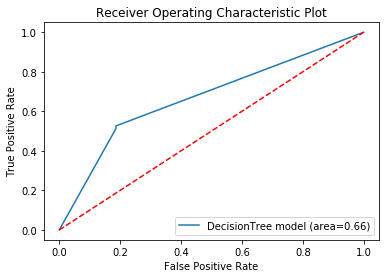

In [112]:
plt.figure()
plt.plot(fpr4,tpr4, label="DecisionTree model (area=%0.2f)" % DT_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

# # KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=10)
classifier_knn.fit(x_tr, y_tr)
y_knn_train = classifier_knn.predict(x_tr)
#print ("Accuracy : ", accuracy_score(y_tr, y_knn_train)) 
print(classification_report(y_tr, y_knn_train))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       459
         1.0       0.86      0.07      0.13        83

    accuracy                           0.86       542
   macro avg       0.86      0.54      0.53       542
weighted avg       0.86      0.86      0.80       542



In [114]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=2)
classifier_knn.fit(x_tr, y_tr)
y_knn_train = classifier_knn.predict(x_tr)
#print ("Accuracy : ", accuracy_score(y_tr, y_knn_train)) 
print(classification_report(y_tr, y_knn_train))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       459
         1.0       1.00      0.31      0.48        83

    accuracy                           0.89       542
   macro avg       0.94      0.66      0.71       542
weighted avg       0.91      0.89      0.87       542



In [116]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(x_tr, y_tr)
y_knn_train = classifier_knn.predict(x_tr)
#print ("Accuracy : ", accuracy_score(y_tr, y_knn_train)) 
print(classification_report(y_tr, y_knn_train))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       459
         1.0       0.81      0.35      0.49        83

    accuracy                           0.89       542
   macro avg       0.85      0.67      0.71       542
weighted avg       0.88      0.89      0.87       542



In [119]:
y_knn_test = classifier_knn.predict(x_te)
print(classification_report(y_te, y_knn_test))
print("confusion matrix:", metrics.confusion_matrix(y_te, y_knn_test))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       467
         1.0       0.39      0.20      0.26        76

    accuracy                           0.85       543
   macro avg       0.64      0.57      0.59       543
weighted avg       0.81      0.85      0.82       543

confusion matrix: [[444  23]
 [ 61  15]]


In [120]:
KNN_ROC_auc4=roc_auc_score(y_te, classifier_knn.predict(x_te))
fpr4, tpr4, threshold=roc_curve(y_te, classifier_knn.predict_proba(x_te)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

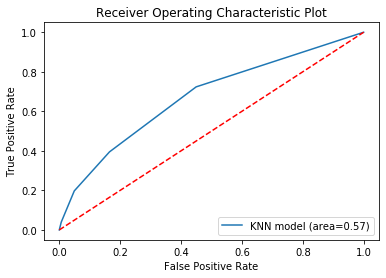

In [121]:
plt.figure()
plt.plot(fpr4,tpr4, label="KNN model (area=%0.2f)" % KNN_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

## Neural Network

In [134]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(x_tr, y_tr)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1,
              solver='lbfgs')

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [135]:
y_Neu_train = clf.predict(x_tr)
print ("Accuracy : ", accuracy_score(y_tr, y_Neu_train)) 
print(classification_report(y_tr, y_Neu_train))

Accuracy :  0.8985239852398524
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       459
         1.0       0.74      0.52      0.61        83

    accuracy                           0.90       542
   macro avg       0.83      0.74      0.78       542
weighted avg       0.89      0.90      0.89       542



In [126]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 6), random_state=1)
clf.fit(x_tr, y_tr)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 6), random_state=1,
              solver='lbfgs')

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [127]:
y_Neu_train = clf.predict(x_tr)
print ("Accuracy : ", accuracy_score(y_tr, y_Neu_train)) 
print(classification_report(y_tr, y_Neu_train))

Accuracy :  0.8542435424354243
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       459
         1.0       1.00      0.05      0.09        83

    accuracy                           0.85       542
   macro avg       0.93      0.52      0.51       542
weighted avg       0.88      0.85      0.79       542



In [136]:
y_Neu_test = clf.predict(x_te)
print(classification_report(y_te, y_Neu_test))
print("confusion matrix:", metrics.confusion_matrix(y_te, y_Neu_test))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       467
         1.0       0.51      0.39      0.44        76

    accuracy                           0.86       543
   macro avg       0.71      0.67      0.68       543
weighted avg       0.85      0.86      0.85       543

confusion matrix: [[438  29]
 [ 46  30]]


In [137]:
Neu_ROC_auc4=roc_auc_score(y_te, clf.predict(x_te))
fpr4, tpr4, threshold=roc_curve(y_te, clf.predict_proba(x_te)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

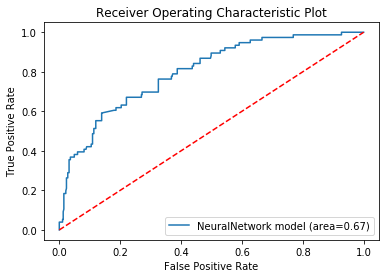

In [138]:
plt.figure()
plt.plot(fpr4,tpr4, label="NeuralNetwork model (area=%0.2f)" % Neu_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_tr,y_tr)

C:\Users\luyid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
predictions = logmodel.predict(x_te)
print(classification_report(y_te,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       467
         1.0       0.62      0.37      0.46        76

    accuracy                           0.88       543
   macro avg       0.76      0.67      0.70       543
weighted avg       0.86      0.88      0.87       543



In [142]:
log_ROC_auc4=roc_auc_score(y_te, predictions)
fpr4, tpr4, threshold=roc_curve(y_te, logmodel.predict_proba(x_te)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

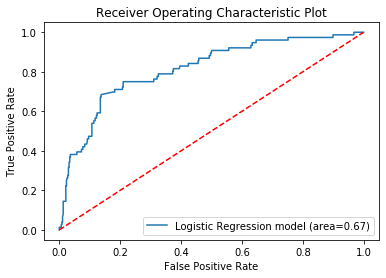

In [143]:
plt.figure()
plt.plot(fpr4,tpr4, label="Logistic Regression model (area=%0.2f)" % log_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

## Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
rfc_pred = rfc.predict(x_te)


In [146]:
print(classification_report(y_te,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       467
         1.0       0.55      0.37      0.44        76

    accuracy                           0.87       543
   macro avg       0.73      0.66      0.68       543
weighted avg       0.85      0.87      0.86       543



In [147]:
rfc_ROC_auc4=roc_auc_score(y_te, rfc_pred)
fpr4, tpr4, threshold=roc_curve(y_te, rfc.predict_proba(x_te)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

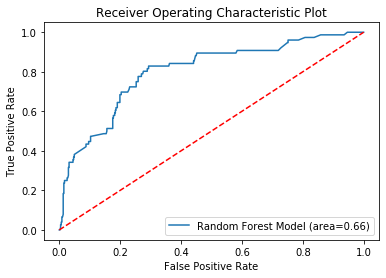

In [148]:
plt.figure()
plt.plot(fpr4,tpr4, label="Random Forest Model (area=%0.2f)" % rfc_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show

## Support Vectors Machine

In [149]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
svc_model.fit(x_tr,y_tr)


C:\Users\luyid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [150]:
svp_predictions = svc_model.predict(x_te)
print(classification_report(y_te,svp_predictions))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       467
         1.0       0.60      0.04      0.07        76

    accuracy                           0.86       543
   macro avg       0.73      0.52      0.50       543
weighted avg       0.83      0.86      0.81       543



In [151]:
svm_ROC_auc4=roc_auc_score(y_te, svp_predictions)

In [152]:
fpr4, tpr4, threshold=roc_curve(y_te, svc_model.predict_proba(x_te)[:,1])

<function matplotlib.pyplot.show(*args, **kw)>

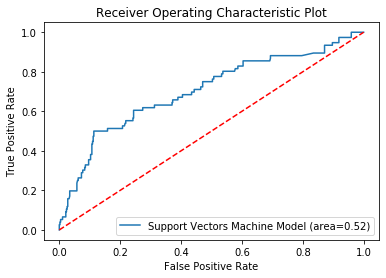

In [153]:
plt.figure()
plt.plot(fpr4,tpr4, label="Support Vectors Machine Model (area=%0.2f)" % svm_ROC_auc4)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Plot")
plt.legend(loc="lower right")
plt.show